# PRiAD 6 - test zaliczający

Test obejmuje materiał z ćwiczenia PRiAD6, wymaga także znajmości zagadnień z wcześniejszych ćwiczeń (w szczególności z uczenia nienadzorowanego). 

---
**Imię, nazwisko i numer indeksu:** (Aleksandra Kowalczyk 307414)

---

In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as pat
from skimage import io
import skimage as si
import skimage.filters as sif
import skimage.segmentation as sis
import skimage.measure as sime
import skimage.morphology as simo
import skimage.color as sic

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

# zmiana sposobu wyświetlania danych typu float
pd.options.display.float_format = "{:.2f}".format 


#FUNKCJE POMOCNICZE

def pokaz(im, tytul = "", osie = False):
    if not(osie):
        plt.axis("off") 
    if im.ndim == 2:
        plt.imshow(im,cmap='gray')
    else:
        plt.imshow(im)
    plt.title(tytul)
    
def pliob(listaobr, ile_k = 1, listatyt = [], wart_dpi = 100, osie = False):
    # wyswietla liste obrazow kolorowych lub s skali szarosci
    rozm_obr = 5
    ile = len(listaobr)
    if len(listatyt) == 0:
        listatyt = [' ']*ile
    ile_w = np.ceil(ile / ile_k).astype(int)
    figsize_k = rozm_obr*ile_k
    figsize_w = rozm_obr*ile_w
    plt.figure(figsize=(figsize_k,figsize_w), dpi = wart_dpi)
    for i in range(0,ile):
        if isinstance(listaobr[i],np.ndarray):
            plt.subplot(ile_w,ile_k,i+1)
            pokaz(listaobr[i], listatyt[i], osie)
    plt.show()
    
    
# funkcja wyświetlająca obraz wraz z jego histogramem
def pokazhist(obraz):
    plt.figure(figsize=(10,5), dpi= 80)

    plt.subplot(1,2,1)
    pokaz(obraz)
    plt.subplot(1,2,2)
    if obraz.ndim == 3:
        color = ('b','g','r')
        for i,col in enumerate(color):
            plt.hist(obraz[:,:,i].ravel(), bins = 256, color = col)
            plt.xlim([0,256])
        plt.show()
    else:
        histr = np.histogram(obraz, bins = 256)
        plt.hist(obraz.ravel(), bins = 256)
        plt.xlim([0,256])
        plt.show()    
        
# wyswielanie obrazu oraz wyniku zastosowania LUT
def pokazlut(obr,lut):
    obrwyj = obr.copy()
    obrwyj = lut[obr]
    plt.figure(figsize=(15,5), dpi= 80)
    plt.subplot(1,3,1)
    pokaz(obr)
    plt.subplot(1,3,2)
    plt.plot(lut, color = 'b' )
    plt.xlim([0,256])
    plt.ylim([0,256])
    plt.subplot(1,3,3)
    pokaz(obrwyj)
    return obrwyj

> **Zadanie 1** Wczytaj obraz `PRiAD6.tif`. Obraz zawiera owalne obiekty trzech rodzajów - małe oraz większe o dwóch orientacjach. Dokonaj jego binaryzacji (poprzedzonej lub porzedzającej jeśli to konieczne) filtrację tak by otrzymać obraz zawierający jedynie białe owalne obiekty trzech rodzajów na jednolitym czarnym tle. 

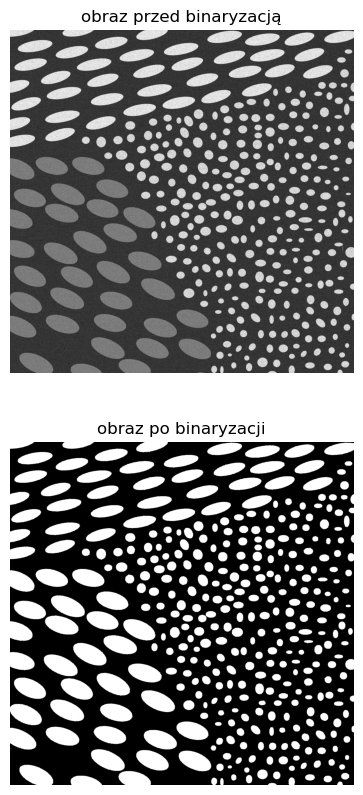

In [26]:
obraz = sic.rgb2gray(io.imread('PRiAD6.tif'))
prog = 60

binarny = (obraz > prog)
otwarcie = simo.opening(binarny, simo.square(5))

liobr = []
lipod = []

lipod.append("obraz przed binaryzacją")
lipod.append("obraz po binaryzacji")

liobr.append(obraz)
liobr.append(otwarcie)

pliob(liobr,1,lipod)

> **Zadanie 2** Wykonaj etykietowanie obiektów, w efekcie którego każdy obiekt otrzyma swoją unikalną etykietę. Wyświetl w dowolny sposób obraz zawierający etykiety. Dobierz cechy umożliwiające rozróżnienie trzech rodzajów obiektów 

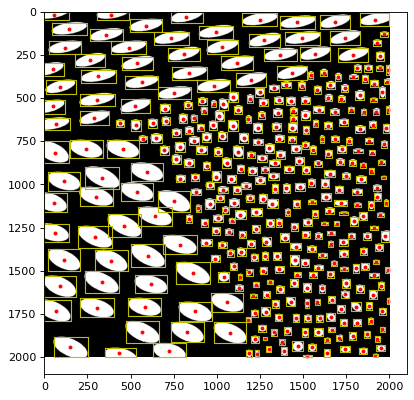

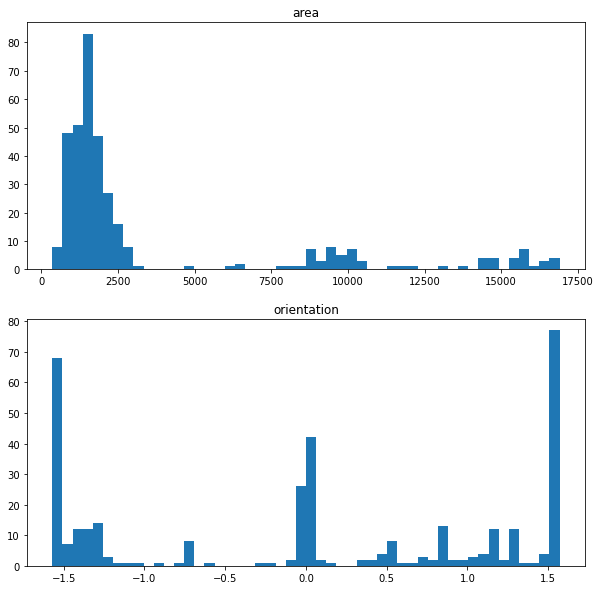

In [28]:
etykiety = sime.label(otwarcie)
cechy = sime.regionprops(etykiety)

plt.figure(figsize = (6,6), dpi = 80)
plt.imshow(otwarcie, cmap = plt.cm.gray)
for obiekt in cechy:
    y0, x0 = obiekt.centroid
    plt.plot(x0, y0, '.r', markersize = 5)
    minr, minc, maxr, maxc = obiekt.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    plt.plot(bx, by, '-y', linewidth = 1)
plt.show()

def histogram(cecha):
    cechy_odr = np.zeros(len(cechy))
    for i in range(0, len(cechy)):
        cechy_odr[i] = cechy[i][cecha]
    plt.hist(cechy_odr, 50, label = 'first')
    plt.title(cecha)

plt.figure(figsize = (10,10))
plt.subplot(2, 1, 1)
histogram('area')
plt.subplot(2, 1, 2)
histogram('orientation')

> **Zadanie 3** Wykonaj grupowanie danych wykorzystując wybrane przed chwilą cechy, tak by w jego wyniku uzyskać podział zbioru obiektów na grupy zgodny ze stanem faktycznym tj. z trzema grupami: obiektami małymi i większymi o obu orientacjach. Na podstawie wyniku grupowania wygeneruj obraz, w którym obiekty należące do każdej grupy będą oznaczone inną szrością lub kolorem.

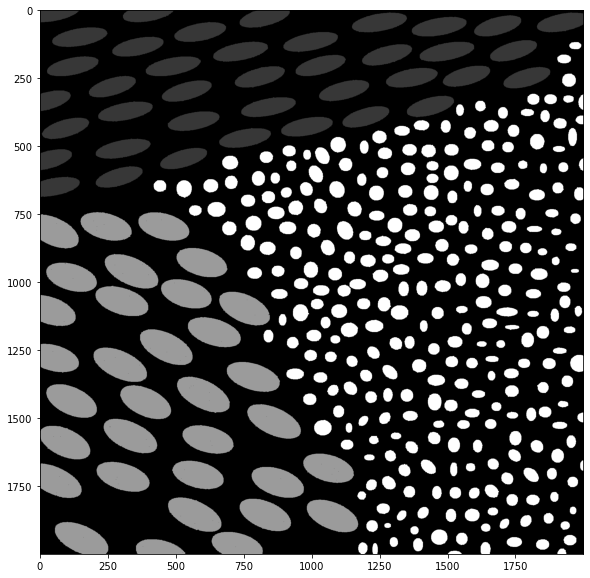

In [24]:
ile_obiektow = len(cechy) 
lista_cech = ['area', 'orientation']
ile_cech = len(lista_cech)

tabela_cech = np.zeros((ile_obiektow,ile_cech+1))
tabela_cech[0,:] = np.nan

for i in range(ile_obiektow):
    for j in range(ile_cech):
        tabela_cech[i,j] = cechy[i][lista_cech[j]]

c1 = np.where(np.isin(etykiety,np.where(tabela_cech[:,0] < 4500)+ np.array(1)),255,0)
c2 = np.where(np.isin(etykiety,np.where((tabela_cech[:,0] > 4500) & (tabela_cech[:,1] > 0))+ np.array(1)),155,0)
c3 = np.where(np.isin(etykiety,np.where((tabela_cech[:,0] > 4500) & (tabela_cech[:,1] < 0))+ np.array(1)),55,0)

plt.figure(figsize = (10, 10))
plt.imshow(c1 + c2 + c3, cmap = 'gray')

> **Zadanie 4** (niepunktowane) Zmień nazwę tego skryptu na następującą "PRiAD6_Imię_Nazwisko.ipynb" i wgraj wgraj go do ISOD-a we wskazane miejsce, nie przekraczając wyznaczonego terminu.